# Forecasting Bitcoin Price

## Initial Motivation

During a wild year in the markets the riskiest asset is one of the popular today. After a historic climb and crash three years ago, bitcoin is at it again in 2020. Like last time, a surge of investor enthusiasm is driving it to all-time highs, and bitcoin enthusiast's say that this is only the beginning. They see bitcoin as a revolution in financial systems, this has been the message for about 11 years and people are finally starting to listen and take note. But many experts watching bitcoin warn that the asset is too volatile for average investors and that its a purely speculative bet that won't be able to scale.

### How Does Bitcoin Work?

The way bitcoin works is key to understanding why it's so popular. Unlike other investments, the cryptocurrency isn't tied to physical assets or the USD. The purpose of bitcoin is just to allow two people anywhere to exchange value directly. What that means is that there is no one central party controlling this network, there is no government, no central bank that could shut down or arbitrarily raise or lower the value.

At its core bitcoin is purely software, it runs on a network of interlinked but independent computers. They form a ledger of transactions between people across the world. Instead of that ledger being controlled by a single master computer or a single party, the information is copied on every computer that is part of the network. This is a cryptocurrency blockchain and it can be viewed by anybody and what that does is it prevents counterfeiting, it prevents double spending, and it makes bitcoin a secure currency.

Every time someone makes a transaction a unique encrypted signature is added to the ledger for verification. Once confirmed and completed that signature cannot be changed, it cannot be altered, and essentially it means you can't counterfeit a bitcoin, that's what keeps the network honest. Bitcoin enthusiasts argue that the network is un-hackable, but that's not necessarily true. The issue is that to hack it you would have to take over the network, you would need your own network of computers running 24/7 and to do that would cost billions of dollars. You can do, but it isn't really feasible. 

And while anyone can download and run the program to become part of the blockchain network, no one has the ability to make universal changes. Bitcoins not yet available to the public are created through a process known as mining. Miners use powerful computers to solve complex math problems to process bitcoin transactions. This process unlocks new digital coins, but these coins aren't limitless. Bitcoin's source code was embedded with the condition that there will always be a finite number of coins available, and this scarcity is what gives bitcoin value.

Currently about 18.5 million of the 21 million maximum bitcoins have already been mined. However, the way the network is set up, every four years the reward per batch of transactions confirmed (per mining puzzle) solved gets cut in half. Due to this condition, the last bitcoin won't be created until 2140. And while the number of available bitcoins is growing the demand for them is growing faster, and this demand has a lot to do with how individual investors are trading.

Bitcoin is becoming easier to buy on apps like Paypal, Square, and Robinhood which is drawing more novice retail investors who are looking for quick returns while trading at home. So far this year, there have been more than 38 million small bitcoin transfers, trades that are less than 1000 dollars, this is up from about 20 million dollars in 2017; larger institutional investors are pilling in was well.

It will be interesting to see to which degree central banks start to digitize their own currencies. As financial systems become more digital, it's leading to bitcoin more mainstream, but the digital currency's resurgence is also closely tied to the state of global finance. When the coronavirus pandemic hit, when the central banks respond the way they did, what they did was push down interest rates and lowered the values of their currencies. That has made bitcoin essentially a hedge against the US Dollar. The value of the dollar is going down then the proponents say that the value of bitcoin should be going up. 

What we have seen is the last couple of months is that people are interested in assets that have high returns. They are willing to take risks and one of the highest returned, highest risk assets anywhere in the capital market is bitcoin. This potential for big profits driving a frenzy of momentum trading, and for many investors these bets are paying off, the digital currency is about 220 percent in the past year. 

One reason investing in bitcoin is so risky is how small the market is, the total value of bitcoin in circulation right now is about 420 billion dollars, in comparison the value of apple stock is about 2 trillion, and the value for the financial market for gold is larger than 12 trillion dollars. Essentially, bitcoin is still very small and so it doesn't take a lot of people to come in and push the value up. The small size of the market contributes to these sort of explosive price moves that we've seen and because the cryptocurrency is decentralized there is no insurance backing it. 

There are no breaks on the value, it could potentially go to zero tomorrow and there would be nothing to stop it. Until the market matures, experts warn that the price of bitcoin will continue to see volatile swings.

[Source](https://www.youtube.com/watch?v=HhOuvNDMlI0/)

## Data Collection & Preprocessing

So the first thing that we are going to want to do is collect data. We will use Yahoo Bitcoin History, the data is free to download. Available [here](https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD&guccounter=1&guce_referrer=aHR0cHM6Ly90b3dhcmRzZGF0YXNjaWVuY2UuY29tL3ByZWRpY3RpbmctcHJpY2VzLW9mLWJpdGNvaW4td2l0aC1tYWNoaW5lLWxlYXJuaW5nLTNlODNiYjRkZDM1Zg&guce_referrer_sig=AQAAADw3s4Aaum1jPPN-7OIUDQmu6j4SiVGzs0U51SpDhE84Ec30JpqsegxOZYH5lnrNdcM-ZqTtFRI7VLXpikmV4GPDk1ZDnQeBQrtA4W96EdxGo0dwZbtcLWqtK3z3POErPkEb1VvQe0PF8fBlArbyg2HguzJ8pEXcT7ptl3tqR5iZ).

We are also using US Dollar Index Futures Historical Data from Investing.com. Available [here](https://www.investing.com/currencies/us-dollar-index-historical-data).

We want to make sure that we are using enough historical data to make the model more accurate. We are using historical data for bitcoin and usd prices from Aug 2015 to Dec 2020.

Reading and Displaying BTC Time Series Data

In [5]:
#pip install pandas-datareader
import pandas_datareader.data as web
import datetime
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [4]:
import datetime

In [6]:
import pandas_datareader as web 

btc = web.get_data_yahoo(['BTC-USD'], start=datetime.datetime(2018, 1, 1), end=datetime.datetime(2020, 12, 2))['Close']

print(btc.head())

Symbols          BTC-USD
Date                    
2017-12-31  14156.400391
2018-01-01  13657.200195
2018-01-02  14982.099609
2018-01-03  15201.000000
2018-01-04  15599.200195


Date: This is the index in our time series that specifies the date associated with the price.

Close: The last price at which BTC was purchased on that day.

Open: The first price at which BTC was purchased on that day.

High: The highest price at which BTC was purchased that day.

Low:  The lowest price at which BTC was purchased that day.

Volume: The number of total trades that day.

Adj Close: The closing price adjusted for dividends and stock splits.

Let’s write our closing price BTC data to a csv file. This way, we can avoid having to repeatedly pull data using the Pandas data reader. 

In [7]:
btc.to_csv("btc.csv")

Now, let’s read in our csv file and display the first five rows:

In [8]:
btc = pd.read_csv("btc.csv")
print(btc.head())

         Date       BTC-USD
0  2017-12-31  14156.400391
1  2018-01-01  13657.200195
2  2018-01-02  14982.099609
3  2018-01-03  15201.000000
4  2018-01-04  15599.200195


In order to use the models provided by the stats library, we need to set the date column to be a data frame index. We also should format that date using the to_datetime method:

In [9]:
btc.index = pd.to_datetime(btc['Date'], format='%Y-%m-%d')

Let’s display our data frame:

In [10]:
del btc['Date']

Let’s plot our time series data. To do this, let’s import the data visualization libraries Seaborn and Matplotlib:

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

And label the y-axis and x-axis using Matplotlib. We will also rotate the dates on the x-axis so that they’re easier to read:

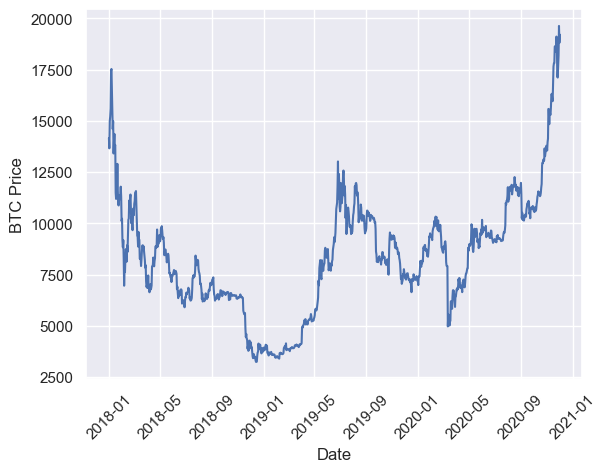

In [13]:
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(btc.index, btc['BTC-USD'], )

Splitting Data for Training and Testing

An important part of model building is splitting our data for training and testing, which ensures that you build a model that can generalize outside of the training data and that the performance and outputs are statistically meaningful. 

We will split our data such that everything before November 2020 will serve as training data, with everything after 2020 becoming the testing data:

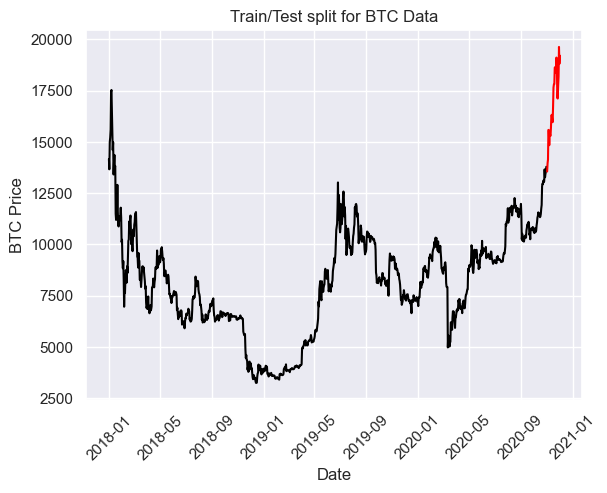

In [14]:
train = btc[btc.index < pd.to_datetime("2020-11-01", format='%Y-%m-%d')]
test = btc[btc.index > pd.to_datetime("2020-11-01", format='%Y-%m-%d')]

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.show()

Autoregressive Moving Average (ARMA)

In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [29]:
y = train['BTC-USD']

In [30]:
ARMAmodel = SARIMAX(y, order = (1, 0, 1))

/Users/thaonguyen/opt/anaconda3/envs/.venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/thaonguyen/opt/anaconda3/envs/.venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [31]:
ARMAmodel = ARMAmodel.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.25882D+00    |proj g|=  1.44174D-03

At iterate    5    f=  7.25827D+00    |proj g|=  4.20835D-03

At iterate   10    f=  7.25824D+00    |proj g|=  6.53622D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     17      1     0     0   6.536D-05   7.258D+00
  F =   7.2582357357105911     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


Generate our predictions:

In [32]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = 
                                             y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

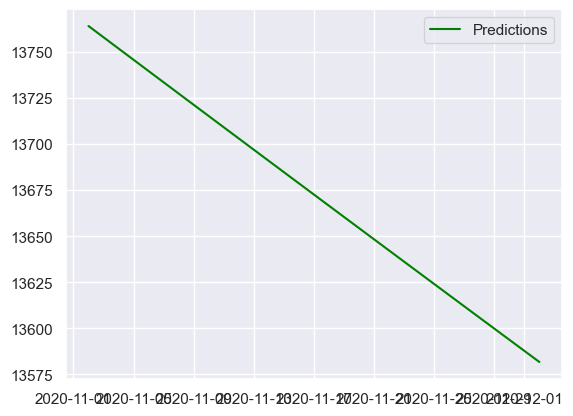

In [33]:
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

We can also evaluate the performance using the root mean-squared error:

In [27]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["BTC-USD"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  3646.000126484163


Autoregressive Integrated Moving Average (ARIMA)

In [34]:
from statsmodels.tsa.arima.model import ARIMA

/Users/thaonguyen/opt/anaconda3/envs/.venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/thaonguyen/opt/anaconda3/envs/.venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/thaonguyen/opt/anaconda3/envs/.venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/thaonguyen/opt/anaconda3/envs/.venv/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RMSE:  906.8046954754458


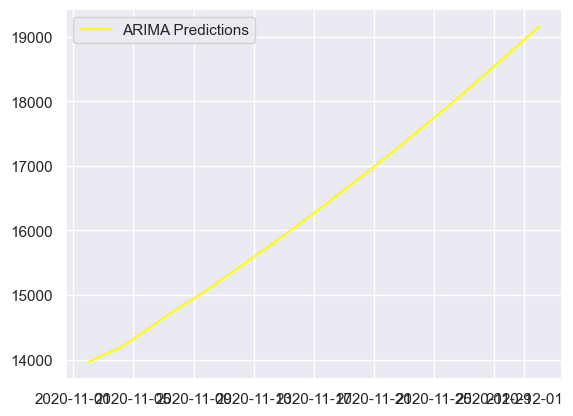

In [36]:
ARIMAmodel = ARIMA(y, order = (5, 4, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.legend()


import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["BTC-USD"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

Seasonal ARIMA (SARIMA)

/Users/thaonguyen/opt/anaconda3/envs/.venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/thaonguyen/opt/anaconda3/envs/.venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/thaonguyen/opt/anaconda3/envs/.venv/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.23425D+00    |proj g|=  3.95065D-01


 This problem is unconstrained.



At iterate    5    f=  7.91804D+00    |proj g|=  1.41092D-02

At iterate   10    f=  7.91161D+00    |proj g|=  7.62973D-03

At iterate   15    f=  7.90977D+00    |proj g|=  3.47696D-03

At iterate   20    f=  7.89675D+00    |proj g|=  3.33722D-02

At iterate   25    f=  7.87467D+00    |proj g|=  7.67750D-03

At iterate   30    f=  7.87135D+00    |proj g|=  7.70400D-04

At iterate   35    f=  7.87107D+00    |proj g|=  8.20016D-04

At iterate   40    f=  7.86874D+00    |proj g|=  1.56170D-02

At iterate   45    f=  7.82097D+00    |proj g|=  6.75400D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     46     69   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


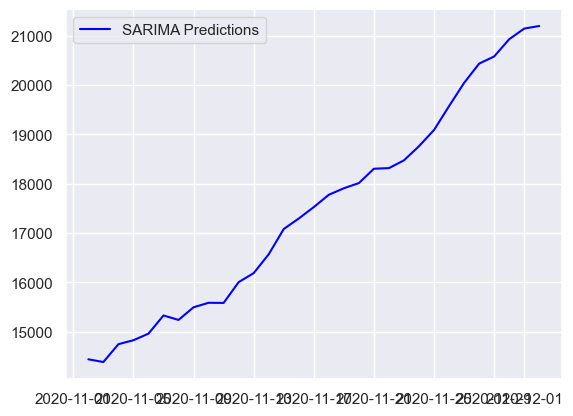

In [37]:
SARIMAXmodel = SARIMAX(y, order = (5, 4, 2), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Blue', label = 'SARIMA Predictions')
plt.legend()